# Performance

Alex Gaynor: Fast Python, Slow Python - PyCon 2014 - [video](https://www.youtube.com/watch?v=7eeEf_rAJds) - [review](https://github.com/ADGEfficiency/personal/blob/master/reviews/work/fast_slow_python.md)

Benchmarks are lies - impossible to reduce performance to a single number

Performance is about specialization
- specialize the algorithm for the use case
- specialize code to get it to run faster

# Complexity

[Ned Batchelder - Big-O: How Code Slows as Data Grows - PyCon 2018](https://www.youtube.com/watch?v=duvZ-2UK0fc)

Also known as
- time complexity 
- algorithmic complexity
- asympotic complexity

How code slows as data grows
- estimated analytically
- measured directly (ideally!)

## Big $\mathcal{O}$(n) notation

$n$ = amount of data

$\mathcal{O}$ = order magnitude

Dimensionless
- not the running time

Relationship between data & code speed
- how does the code slow down as data gets larger

If I give the code 10x the data - how much longer will it take?

The $\mathcal{O}(n)$ refers to $n$ in the limit - an $n$ gets very large

(0, 100)

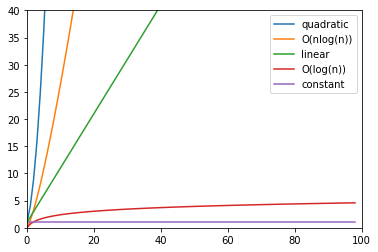

In [16]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1, 100)

f, a = plt.subplots()
plt.plot(np.power(n, 2), label='quadratic')
plt.plot(np.log(n) * n, label='O(nlog(n))')
plt.plot(n, label='linear')
plt.plot(np.log(n), label='O(log(n))')
plt.plot(np.ones_like(n), label='constant')

plt.legend()
plt.ylim(0, 40)
plt.xlim(0, 100)

Don't use fancy algo with small n - in the small n region they all look very similar

(0, 10)

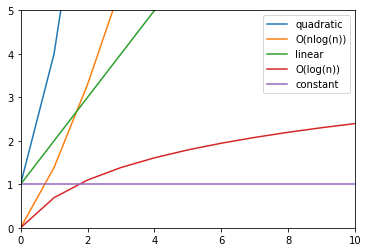

In [17]:
f, a = plt.subplots()
plt.plot(np.power(n, 2), label='quadratic')
plt.plot(np.log(n) * n, label='O(nlog(n))')
plt.plot(n, label='linear')
plt.plot(np.log(n), label='O(log(n))')
plt.plot(np.ones_like(n), label='constant')

plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 10)

## How to determine Big-O

1. which piece of code
2. what is n (not the value, but the variable)
3. count steps in a typical run
4. keep the highest term (throw away lower order components)


## Discussion

Don't look ahead!

For all the operations below - estimate the complexity
- length of list
- iterating over a list
- finding an element in a sorted list
- a nested for loop


## Constant time 

$\mathcal{O}(1)$

Example - finding the length of a Python list

In [18]:
small = list(np.random.rand(100))
large = list(np.random.rand(1000))

In [19]:
%timeit len(small)

50.2 ns ± 1.29 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [20]:
%timeit len(large)

61.4 ns ± 1.19 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Linear time

$\mathcal{O}(n)$ 

Example - iterating over a list

In [21]:
%timeit for item in small: pass

675 ns ± 29.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [22]:
%timeit for item in large: pass

6.48 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Logarithmic time

$\mathcal{O}(log(n))$ 

Example = finding elements in a sorted list

Binary search cuts the length of the sorted list in half each time -> O(log(n))

In [23]:
unsort_small = np.random.uniform(0, 100, 100)
unsort_large = np.random.uniform(0, 100, 1000)

In [24]:
def brute_force(data):
    query = np.random.choice(data)
    for i in data: 
        if i == query: 
            break

In [25]:
%timeit brute_force(unsort_small)

5.34 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
%timeit brute_force(unsort_large)

34.9 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
sort_small = sorted(unsort_small)
sort_large = sorted(unsort_large)

In [28]:
def divide_and_conquer(data):
    query = np.random.choice(data)
    split = int(len(data) / 2)
    while split:
        split = int(len(data) / 2)
        centre = data[split]

        if centre == query:
            return True

        if centre < query:
            data = data[split:]
        else:
            data = data[:split]

In [29]:
%timeit divide_and_conquer(sort_small)

11.3 µs ± 520 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
%timeit divide_and_conquer(sort_large)

63.1 µs ± 482 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Quadratic time

$\mathcal{O}(n^2)$ 

Example - nested for loops

## Practical

Demonstrate that a nested for loop is quadratic time

## Practical

What is the complexity of the following in Python
- `list.append` O(1)
- `val in list` O(n)
- `dict[key]` O(1)
- `key in dict` O(1) - hashing!
- `val in set` O(1)

## More

O(n3, n4, 2^n, n^n, n!)

More dimensions

Typical versus worst case